<center> <h1> <font color='Green'> GREEN TEAM <font> </h1> </center>

<h3><center><font color='GREEN'> 1. AAWAZ GAUTAM, 2. SONJOY PAUL AVI, 3. DHARMIK PATEL</font></center></h3>

<h3><center><font color='GREEN'>PROJECT ASSIGNMENT: ANALYSING AQUIFER AND GROUND WATER LEVEL OF SOUTHEST TEXAS</font></center></h3>

<p> Aquifer: Aquifer is a body of porous rock or sediment saturated with groundwater.
    There are two types of aquifer 1. Unconfined, 2. Confined</p>

<p> According to United States Geological Survey (USGS) figures, groundwater provides an estimated:
    1. 22% of all freshwater withdrawals.
    2. 37% of agricultural use (mostly for irrigation).
    3. 37% of the public water supply withdrawals.
    4. 51% of all drinking water for the total population.
    5. 99% of drinking water for the rural population . </p>

<p> <font> In this notebook we want to work with the datas from GAM model, MOD Flow and HAGM model. We want to create a relational database and then graphically plot maps using those datas. The potential areas could be aquifer depth change, water quality, etc</p>
<p>           </p>

<h4><font color='GREEN'> Load Libraries </font> </h4>

In [2]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import os
import warnings
warnings.filterwarnings("ignore")

<h4><font color='GREEN'> Importing the datas from .dis file of HAGM. </font> </h4>

#DIS stands for discretization file format. It has a flat file datas of  10 columns and 17125 rows. This file stores the data of 5 layer(4top 1bottom) of 4 aquifers(Chicot, Evangeline, Burkeville and Jasper).
#We used numpy matrix shaping feature to seperate this flat datafile to retain the datas for individual aquifer.

In [3]:
a=np.genfromtxt('D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\Data_HAGM2013.csv', delimiter=',')
a# The shape of this file is initially 17125 x 10

array([[-10000., -10000., -10000., ..., -10000., -10000., -10000.],
       [-10000., -10000., -10000., ..., -10000., -10000., -10000.],
       [-10000., -10000., -10000., ..., -10000., -10000., -10000.],
       ...,
       [-10000., -10000., -10000., ..., -10000., -10000., -10000.],
       [-10000., -10000., -10000., ..., -10000., -10000., -10000.],
       [-10000., -10000., -10000., ...,     nan,     nan,     nan]])

<h4><font color='GREEN'> Reshaping the existing datas to the form of 5 layers for 137 rows and 245 columns </font> </h4>

In [5]:
b=a.reshape(5,137,250)

<h4><font color='GREEN'> Separating the depth location of 5 layers for the 4 aquifers and also removing column having 'nan' value </font> </h4>

In [6]:
l1 = b[0][0:137,0:245]
l2 = b[1][0:137,0:245]
l3 = b[2][0:137,0:245]
l4 = b[3][0:137,0:245]
l5 = b[4][0:137,0:245]

We dealt with the rows and columns tabular datas having numerical and string values

<h4><font color='GREEN'> Creating List table of databas that has CellID, ROW No, Col No, and the depth at which 4 tops of the aquifer exists and a bottom exists </font> </h4>

In [7]:
Table1 = pd.DataFrame(columns=['CELL_ID', 'L1', 'L2', 'L3','L4', 'L5'])
Table2 = pd.DataFrame(columns=['CELL_ID', 'ROW', 'COL'])

In [8]:
import warnings
warnings.filterwarnings('ignore')

<h4><font color='GREEN'> Defining a range of numbers for rows number and column numbers and using a loop </font> </h4>

#The CELL_ID is the unique IDENTITY Number of each GRID and it is in the formula of: 10^6 + 10^3 Row No + Col No 

In [9]:
r1 = range(0,137)
r2 = range(0,245)
for i in r1:
    for j in r2:
        c=pow(10,6)+pow(10,3)*(i+1)+(j+1)
        tab1_col = {'CELL_ID':c, 'L1': l1[i,j], 'L2': l2[i,j], 'L3': l3[i,j], 'L4': l4[i,j], 'L5': l5[i,j]}
        tab2_col = {'CELL_ID':c,'ROW': i+1, 'COL': j+1 }
        Table1 = Table1.append(tab1_col, ignore_index = True)
        Table2 = Table2.append(tab2_col, ignore_index = True)

<h4><font color='GREEN'>DATABASE TABLE: Creating the first Table for our database.</font> </h4>
#The table name on database is 'lay_depth' has 3 columns CELL_ID, LAYER, DEPTH. (SIZE: 

In [22]:
lay=['L1', 'L2', 'L3', 'L4', 'L5']
Table1_new = pd.DataFrame(columns=['CELL_ID', 'LAYER', 'DEPTH'])
r3=range(0,len(Table1))
k=k1=0
for k in r3:
    temp=[Table1.L1[k], Table1.L2[k], Table1.L3[k], Table1.L4[k], Table1.L5[k]]
    for k1 in range(0,5):
        tab1new = {'CELL_ID':Table1.CELL_ID[k],'LAYER': lay[k1], 'DEPTH': temp[k1] }
        Table1_new = Table1_new.append(tab1new, ignore_index = True)

In [23]:
Table1_new

,CELL_ID,LAYER,DEPTH
0,1001001.0,L1,-10000.0
1,1001001.0,L2,-10000.0
2,1001001.0,L3,-10000.0
3,1001001.0,L4,-10000.0
4,1001001.0,L5,-10000.0
...,...,...,...
167820,1137245.0,L1,-10000.0
167821,1137245.0,L2,-10000.0
167822,1137245.0,L3,-10000.0
167823,1137245.0,L4,-10000.0


# <h4><font color='GREEN'>DATABASE TABLE: Description of layer table </font> </h4>

In [16]:
TableX = pd.DataFrame(columns=['Layer', 'Description'])
TableX = TableX.append({'Layer':'L1', 'Description': 'Chicot Top'}, ignore_index = True)
TableX = TableX.append({'Layer':'L2', 'Description': 'Evangeline Top'}, ignore_index = True)
TableX = TableX.append({'Layer':'L3', 'Description': 'Burkeville Top'}, ignore_index = True)
TableX = TableX.append({'Layer':'L4', 'Description': 'Jasper Top'}, ignore_index = True)
TableX = TableX.append({'Layer':'L5', 'Description': 'Jasper Bottom'}, ignore_index = True)

In [24]:
TableX

,Layer,Description
0,L1,Chicot Top
1,L2,Evangeline Top
2,L3,Burkeville Top
3,L4,Jasper Top
4,L5,Jasper Bottom


<h4><font color='GREEN'>USING GEOPANDAS TO IMPORT SHAPE FILES OF GRID</font> </h4>
#We import shape files of grid(saved as from geo data base) because we want to preserve geometry of grid in our codes

<AxesSubplot:>

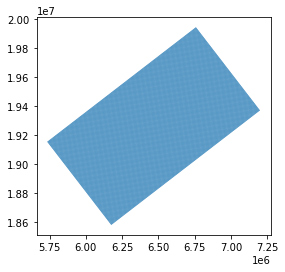

In [17]:
df2 = gpd.read_file('D:\\Fall22\\Python\\Capstone-project-II\\GRID.zip')
df2.plot()

In [18]:
tab3_rem_col = ['CELL_ID','CountyName','CountyNum','CentroidX','CentroidY','AQ_Active1','AQ_Active2','AQ_Active3', 'AQ_Active4', 'geometry']
Table3 = df2.filter(tab3_rem_col, axis=1)
type(Table3)

geopandas.geodataframe.GeoDataFrame

<h4><font color='GREEN'>Description of layer table and set the path </font> </h4>

In [19]:
df3x = pd.read_csv("D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\WellMain.csv")
Table4 = df3x


In [25]:
df4x = pd.read_csv("D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\WaterLevelsMajor.csv", encoding="utf-8")
Table5 = df4x

<h4><font color='GREEN'>CREATING DATABASE </font> </h4>

In [26]:
path_db = 'D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\DBase'
os.chdir(path_db)
os.getcwd()

'D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\DBase'

In [27]:
con= sqlite3.connect("Proj2.db")

TableX.to_sql('lay_desc', con, index=False)
Table1_new.to_sql('lay_depth',con, index=False)
Table2.to_sql('grid_cell_desc',con, index=False)

con.commit()
cur = con.cursor()

<h4><font color='GREEN'> CREATING EMPTY DATABASE WITH Cell_ID as primary Key AND COPYING DATA FROM EXISTING TABLE. </font> </h4>

In [28]:
cur.execute("""BEGIN TRANSACTION;""") #starting the process to edit database saved in cur variable
cur.execute("""ALTER TABLE grid_cell_desc RENAME TO old_grid_cell_desc;""") # renaming the existing table because we dont want to have same name for the table with keys
cur.execute("""
CREATE TABLE grid_cell_desc
(
 CELL_ID INTEGER,
 ROW INTEGER,
 COLUMN INTEGER,
 CONSTRAINT CELL_ID_pk PRIMARY KEY (CELL_ID)
);
""") # Creating a table specifying primary key

cur.execute("""INSERT INTO grid_cell_desc SELECT * FROM old_grid_cell_desc;""") # copying the content of old table to new table
cur.execute("""DROP TABLE old_grid_cell_desc """)#Syntax to Delete old table
cur.execute("""COMMIT;""") # closing the transaction by saving the changes

#Replicating the layer description table in sql database specifying primary key.
#Make Layer as primary Key(primary key name: LAYER_pk)

In [29]:
cur.execute("""BEGIN TRANSACTION;""") #starting the process to edit database saved in cur variable
cur.execute("""ALTER TABLE lay_desc RENAME TO old_lay_desc;""") # renaming the existing table because we dont want to have same name for the table with keys
cur.execute("""
CREATE TABLE lay_desc
(
 LAYER TEXT,
 DESCRIPTION TEXT,
 CONSTRAINT LAYER_pk PRIMARY KEY (LAYER)
);
""") # Creating a table specifying primary key

cur.execute("""INSERT INTO lay_desc SELECT * FROM old_lay_desc;""") # copying the content of old table to new table
cur.execute("""DROP TABLE old_lay_desc """)#Syntax to Delete old table
cur.execute("""COMMIT;""") # closing the transaction by saving the changes

#Replicating the layer depth table in sql database specifying foreign key.
#Make Layer as primary Key

In [30]:
cur.execute("""BEGIN TRANSACTION;""") #starting the process to edit database saved in cur variable
cur.execute("""ALTER TABLE lay_depth RENAME TO old_lay_depth;""") # renaming the existing table because we dont want to have same name for the table with keys
cur.execute("""
CREATE TABLE lay_depth
(
 CELL_ID REAL,
 LAYER TEXT,
 DEPTH REAL,
 FOREIGN KEY (LAYER) REFERENCES lay_desc(LAYER),
 FOREIGN KEY (CELL_ID) REFERENCES grid_cell_desc(CELL_ID)
);
""") # Creating a table specifying primary key

cur.execute("""INSERT INTO lay_depth SELECT * FROM old_lay_depth;""") # copying the content of old table to new table
cur.execute("""DROP TABLE old_lay_depth """)#Syntax to Delete old table
cur.execute("""COMMIT;""") # closing the transaction by saving the changes

#QUERY FROM RELATIONAL DATABASE TO SEE IF TABLES ARE CONNECTED.

In [38]:
query=cur.execute("""SELECT * FROM grid_cell_desc,lay_depth WHERE grid_cell_desc.CELL_ID = 1001001""")

results = cur.fetchall()

print(results)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [40]:
NotebookApp.iopub_data_rate_limit=1.0e10

NameError: name 'NotebookApp' is not defined

In [34]:
# Importing Grid Shapefile
# We got geo database package in our GAM files, we imported that to QGIS converted to ESRI SHapefile.

<Derived Projected CRS: PROJCS["GAM",GEOGCS["NAD83",DATUM["North_American_ ...>
Name: GAM
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

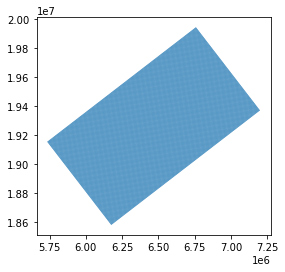

In [32]:
grid_f = 'D:\\Fall22\\Python\\Capstone-project-II\\GRID.zip'
grid = gpd.read_file(grid_f)
grid.plot()
grid.crs

In [35]:
tab4_new_col = ['StateWellNumber','County','Aquifer','LatitudeDD','LongitudeDD','WellDepth']
Table4_1 = df3x.filter(tab4_new_col, axis=1)

# Creating a geometry column 

In [36]:
geodf= gpd.GeoDataFrame(Table4_1, geometry=gpd.points_from_xy(Table4_1.LongitudeDD, Table4_1.LatitudeDD, crs="EPSG:4326"))

geo_c = geodf.to_crs(4269)
type(geo_c)
geo_c.crs
geo_c.to_file("D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\Wellmain.shp")

In [37]:
girid = gpd.read_file('D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\WellMain.zip')
type(girid)
girid.crs
girid

grid_left_df = girid.sjoin(Table3, how="left")

DriverError: '/vsizip/D:\Fall22\Python\Capstone-project-II\Nov_4\WellMain.zip' not recognized as a supported file format.